<a href="https://colab.research.google.com/github/SaketMunda/tensorflow-fundamentals/blob/master/02_neural_network_classfication_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

A classification problem involves predicting whether something is one thing or another.

In this notebook we will see below types of classification problem,
* **Binary classification**
* **Multi-class classification**
* **Multi-label classification**

## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An Input layer
* Some Hidden layer
* An output layer

The following are some standard values you'll often use in your classification neural networks,

| **Hyperparameter** | **Binary Classfication** | **Multiclass Classfication** | 
| --- | --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


In [ ]:
# let's start by importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

We could start by importing a classification dataset but let's practice making some own classification data,

> 🔑 It's common practice to get you and model you build working on a toy (or   simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

We'll use Scikit-learn's `make_circles()` function.

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Let's check the shapes and size
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# check the values
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

But seeing the data in this format is not speaking out anyting. Let's visualize it first.

In [ ]:
# converting them into pandas
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

We can see that we have labels as `0` or `1`, it means that we're going to solve **binary classification problem**.

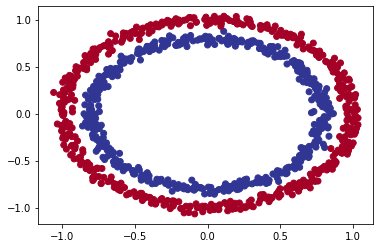

In [ ]:
# visualize with the plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu");

Nice! From the plot, can you guess what kind of model we want to build ?

How about we try to build one to classify blue or red dots ? As in, a model which is able to distinguish blue from red dots.

> **Practice** : [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true)

## Input and Output Shapes

One of the most common issue you'll run into when building deep neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of output data.

In our case, we want to input `X` and get our model to predict `y`

So let's check out the shapes of `X` and `y`.

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Where do these numbers come from ?

In [ ]:
len(X), len(y)

(1000, 1000)

So we've got as many `X` values as we do `y` values, that makes sense.

In [ ]:
# View the first example of features and labels
X[2], y[2]

(array([-0.81539193,  0.17328203]), 1)

Alright, so we've got two `X` features which lead to one `y` value.

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.


> 🤔 **Note**: `y` having a shape of (1000,) can seem confusing. However, this is because all `y` values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one of example of `y`(in our case, the output from our neural network has to be at least one value)



## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model**: piece together the layers of neural network yourself(using the functional or Sequential API) or import a previously built model(known as transfer learning).
2. **Compiling a model**: defining how a model's performance should be measured(loss/metrics) as well as defining how it should improve(optimizer).
3. **Fitting a model**: letting the model try to find patterns in the data(how does `X` get to `y`).

Let's see these in action using Sequential API to build a model for our regression data. And then we'll step through each.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fitting a model
model.fit(X, y, epochs = 100, verbose=0)

In [ ]:
# 4. Evaluating a model
model.evaluate(X, y)

32/32 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931850910186768, 0.5]

Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [ ]:
# Train our model for longer,
model.fit(X, y, epochs=200,verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933965086936951, 0.5]

So even if we have trained our model for little longer than previous, it is not improving, it's performing like it's guessing.

What if we added an extra layer and trained for a little longer ?

In [ ]:
# set random seed
tf.random.set_seed(17)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), # add an extra layer
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit a model
model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate a model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

So even we have added an extra layer the model is not improving.

Let's see what are things we have to do to improve our models.

## Improving a model

To improve a model, we can alter almost every part of the 3 steps we went thrugh before.

1. **Creating a model**: here we might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model**: you might want to choose a different optimization function (such as Adam optimizer, which is usually pretty good for any problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model**: we might train our model little longer by increasing the value of epochs.


How about first try adding more neurons, an extra layer and choose Adam as optimizer function?

In [ ]:
# set the random seed
tf.random.set_seed(17)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), ## adding an extra layer with 100 neurons
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting a model
model_2.fit(X, y, epochs=200, verbose=0)

# Evaluating a model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4150


[0.6936585903167725, 0.41499999165534973]

Oh !

Accuracy decreases more.

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualization to see what's happening.

> 🔑 **Note**: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **Visualize**, **Visualize**, **Visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features `X` and labels `y`.
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls)

If this sounds confusing, let's see it in code and then see the output.

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function is adapated from two phenomenal resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # check the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multi-class classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(np.max(y_pred, axis = 1)).reshape(xx.shape)

  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Now we've got a function to plot our model's decision boundary (the cut off point its making between red and blue dots), let's try it out.

313/313 [==============================] - 1s 1ms/step
doing binary classification...


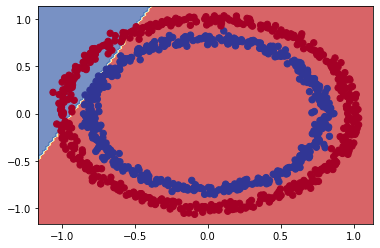

In [ ]:
# check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this ?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [ ]:
# set random seed
tf.random.set_seed(17)

# create some regression data
X_regression = np.arange(0,1000,5)
y_regression = np.arange(100,1100,5)

# Split it into training and test sets
X_reg_train, y_reg_train = X_regression[:150], y_regression[:150]
X_reg_test, y_reg_test = X_regression[150:], y_regression[150:]

# Fit our model to the data
model_2.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100, verbose = 0)


ValueError: ignored

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


We compiled our model for a binary classification problem.

We can recreate it for a regression problem.

In [ ]:
# setup the random seed
tf.random.set_seed(17)

# Recreate a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model, change the loss and metrics for regression model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs=100, verbose=0)

In [ ]:
# evaluate the model
model_3.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 56.8959 - mae: 56.8959


[56.895851135253906, 56.895851135253906]

Let's plot the predictions

2/2 [==============================] - 0s 13ms/step


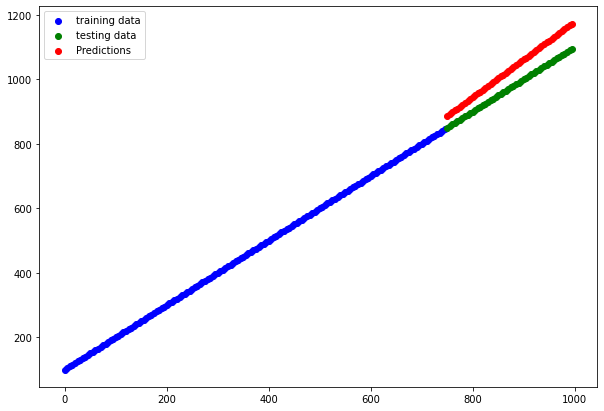

In [ ]:
# Make a predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we are missing out on for our classification problem.

## The missing piece : Non-Linearity

Okay so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight lines (non-linear)?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

There is a concept of activation function while setting up the neural network layers, and there are multiple activation function and each has it's own use case.

Types of **Activation Function**:
* ReLu
* Softmax
* Linear
* Sigmoid

By default each layer has a activation function as `None`.

Since we are dealing with non-linear binary classification problem, so we can try with other activation function except `Linear`.

Let's do the modelling,

In [ ]:
# set the random seed
tf.random.set_seed(17)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"), # 1 hidden layer with activation function Relu
    tf.keras.layers.Dense(1) # output layer
])

# 2. Compile a model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=200, verbose=0)

# 4. Evaluating
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000


[0.6992375254631042, 0.5]

Okay so it looks like that model is still guessing rather learning for this kind of inputs.

Let's tweak the things in [TensorFlow Playground](https://playground.tensorflow.org/) and immitate here.

![Image](https://drive.google.com/uc?export=view&id=1n_l6LZHfwYVlCiiBK52IMyylP2ytZWZT)

Let's mock the above settings into our model

In [ ]:
# Set the random seed
tf.random.set_seed(17)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1) # Output layer
])

# Compile a model
model_5.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=200, verbose=0)

# Evaluate
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Hmmmm, Still it's not doing well. What's wrong with our model now.

I think there is one more missing thing, i.e **output layer activation function**.

This was mentioned in the *typical* **Architecture of Classification Neural Network**, that Output Layer should have activation function with `Sigmoid` for Binary Classification

Let's try that,

In [ ]:
# set the random seed
tf.random.set_seed(17)

# create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile a model
model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
history = model_6.fit(X, y, epochs=200, verbose=0)

# evaluating
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9980


[0.08213627338409424, 0.9980000257492065]

Voila !! OMFG


See the accuracy, it is incredible.

Now let's plot our decision boundary using our function.

313/313 [==============================] - 0s 1ms/step
doing binary classification...


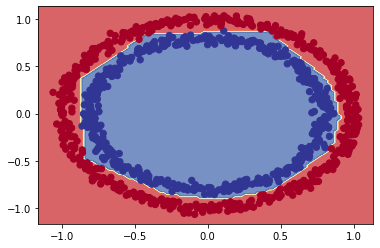

In [ ]:
plot_decision_boundary(model_6, X, y)

**Before**:

When we model with basic settings

313/313 [==============================] - 0s 1ms/step
doing binary classification...


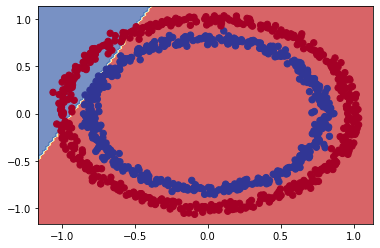

In [ ]:
plot_decision_boundary(model_2, X, y)

We successfully improved our model by tweaking the settings of Neural Network layers

In [ ]:
# let's see the summary of our successful model
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epochs')

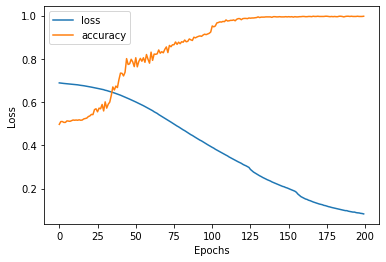

In [ ]:
# and if we plot the history
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

🤔 **Question**: What's wrong the predictions we've made ? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on ?

🔑 **Note**: The combination of **linear(straight lines)** and **non-linear(non-straight lines)** functions is one of the key fundamentals of neural networks.

Think of it like this:

If we have an unlimited amount of straight and non-straight lines, what kind of patterns could we draw ?

That's essentially what neural networks do to find patterns in data.

Now we might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but we have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Create a toy tensor data
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

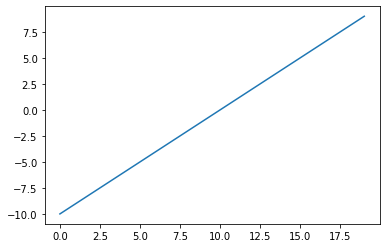

In [ ]:
plt.plot(A)

In [ ]:
# Let's see what Sigmoid activation function do,
# sigmoid(x) = 1 / 1 + exp(-x)

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Let's see what sigmoid return with our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

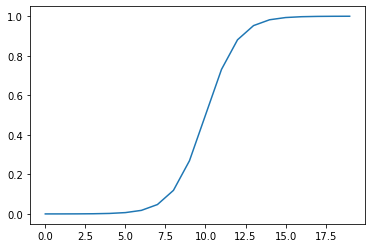

In [ ]:
# ploting
plt.plot(sigmoid(A));

So basically Sigmoid function turns our input to create patterns with some curve lines.

In [ ]:
# Let's see reLu function which is max(x, 0)
def relu(x):
  return tf.maximum(0, x)

# see what our toy tensor looks like
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

So relu activation function, converts all the -ve numbers into 0 and keep the +ve number as it is.

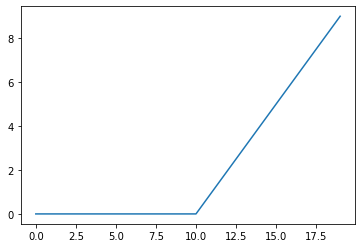

In [ ]:
# plot the relu function
plt.plot(relu(A));

And it gives the bend lines to create pattern.

In [ ]:
# Checking linear function, which says it doesn't modify anything
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

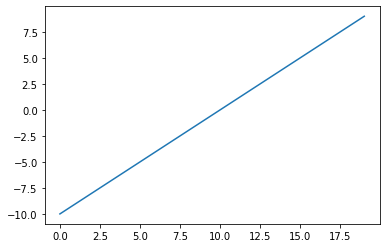

In [ ]:
# it will draw the same plot as it was for A
plt.plot(tf.keras.activations.linear(A))

Activation functions are basically modify our inputs into some output for that layer and become an input for the next layer.

Non-linear functions are able to deduce patterns in non-linear data whereas Linear functions cannot.

📖 **Resource**: [Machine Learning Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) for more on activation functions.

## Evaluating and Improving a Model

We've evaluating our model into the same data that we used for training which is not a good practice.

We should divide our dataset into training and test set atleast.

In [ ]:
# Length of our toy tensor
len(X)

1000

In [ ]:
# Spliting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Checking the shape of the train and test split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Great, now we've got our training and test data sets, let's model the training data and evaluate on test data.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5200
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5838
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5713
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6625
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6450
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6787
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7862
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7750
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.8238
Epoch 11/25
25/25 [

**Learning rate is the frequency of the model to learns (or optimize itself) while training per epochs**. The higher the value the faster the learning rate is.

In [ ]:
# Evaluating the model on test set
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9800


[0.0904218852519989, 0.9800000190734863]

Alright it looks like the model is trained very well to identify the patterns and on test set it performed with outputing the result as 100% accuracy.

Let's plot the decision boundary to compare the prediction between **training** and **test** set.

313/313 [==============================] - 0s 1ms/step
doing binary classification...
313/313 [==============================] - 1s 3ms/step
doing binary classification...


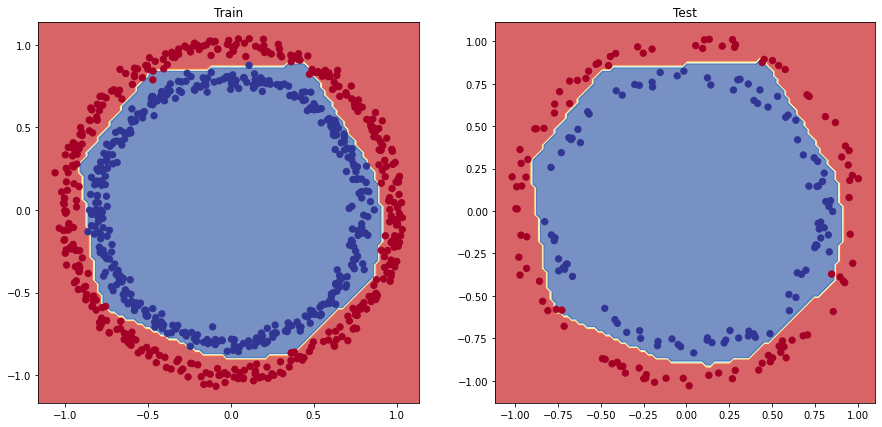

In [ ]:
# Plotting the decision boundary of training samples
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)

# Plotting the decision boundary of test samples
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)

plt.show()

## Plot the loss (or training) curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning ?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

For that, we have assigned the `fit` function to `history` variable.

This is where we'll get the information for how our model is performing as it learns.

In [ ]:
# We can acess the information in the history variable by it's .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.691877,0.50250
1,0.684658,0.52000
2,0.678126,0.58375
3,0.671291,0.57125
4,0.660076,0.66250
5,0.650492,0.64500
6,0.624775,0.67875
7,0.601422,0.78625
8,0.559311,0.77500
9,0.508297,0.82375


Text(0.5, 1.0, 'Model_7 training curves')

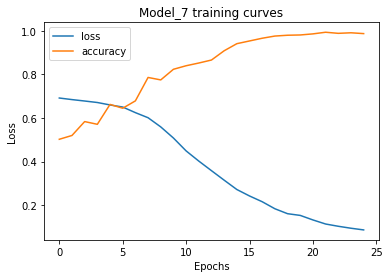

In [ ]:
# If we plot it
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model_7 training curves")

## Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In `model_7`, we have increased the Adam optimizer's learning from the default of `0.001`(default) to `0.1`

It was a lucky guess.

But ideally it is not the way, and we won't be fortunate everytime.

So we might need to find another way to obtain the best learning rate.

To do so, we're going to use the following:

* A [Learning rate callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)
 - We can think of a callback as an extra piece of functionality we can add to our model while it's training.
* Another model
* A modified loss curves plot

In [ ]:
# set the random seed
tf.random.set_seed(17)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a Learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Now fit the model
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Now our model has finished training, let's have a look at the training history.

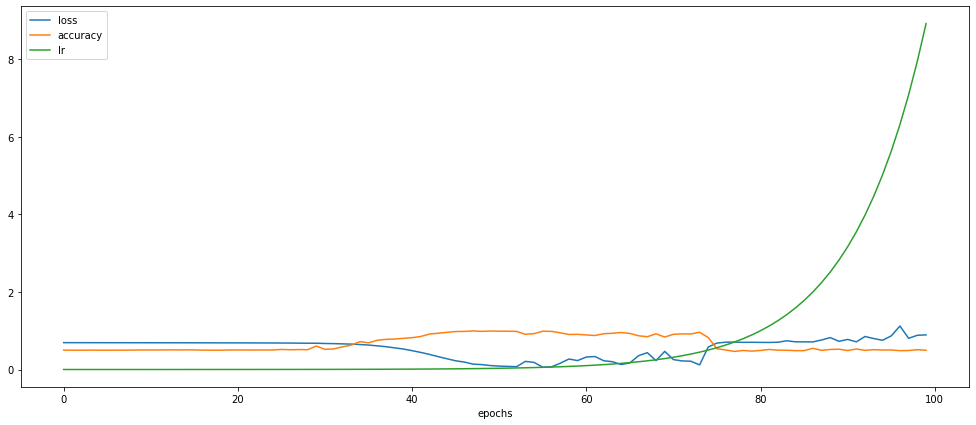

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(17,7), xlabel="epochs");

As we can see that learning rate increases exponentially as the number of epochs increases.

And also we can see that model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'learning rate vs loss')

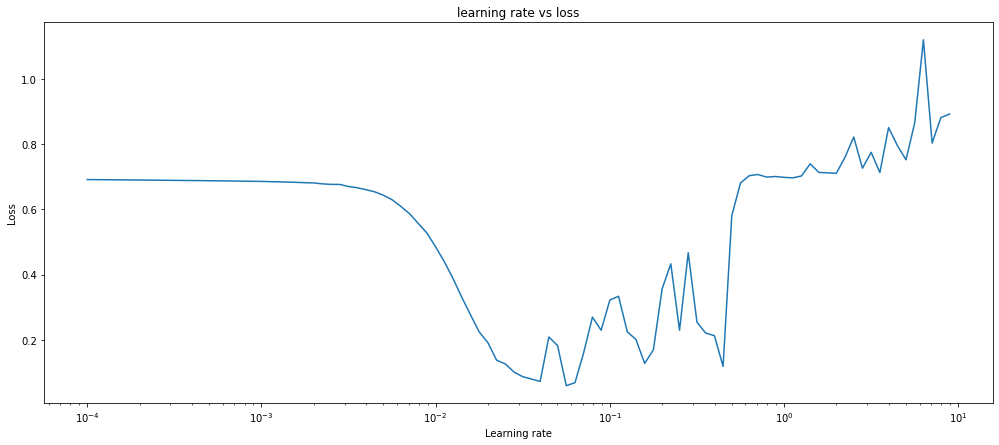

In [ ]:
# Plot the learning rate versus loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(17,7))
plt.semilogx(lrs, history_8.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("learning rate vs loss")


To figure out the ideal learning rate (at least the ideal value to begin with), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

![Image](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use between `0.01` - `0.001`), so let's choose `0.002` to build our model, and refit it

In [ ]:
# random seed
tf.random.set_seed(17)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), # model_7 learning rate was 0.01 which has the highest accuracy of 99%
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5025
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5025
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5125
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5275
Epoch 11/

Awesome !

By adjusting the new learning rate `0.002`, we have better accuracy of 99.5% compared to learning rate of `0.01`

In [ ]:
# Evaluate on test set
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9900


[0.13578376173973083, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification...
313/313 [==============================] - 0s 1ms/step
doing binary classification...


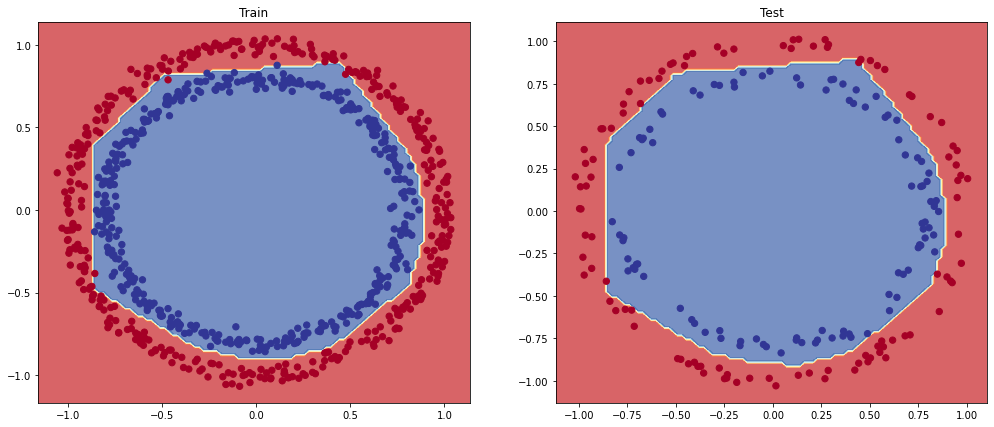

In [ ]:
# Let's plot the predictions

plt.figure(figsize=(17,7))

# On training set
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

# Test set
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)


plt.show();

## More classfication evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* **Accuracy** : *How many predictions are correct*
* **Precision** : *Higher the precision, less false positive. Meaning less chances of showing fake true predictions, model predicting 1 when it's 0*
* **Recall** : *Higher the recall, less false negative. Meaning less chances of showing fake false predictions, model predicting 0 when it's 1*
* **F1 Score** : *Combination of precision and recall as one metric. 1 is best, 0 is worst.*
* **Confusion Matrix** : *Compares the predicted values with the true values in a tabular way. if 100% correct, all values in the matric will be top left to bottom right (diagonal line)*
* **Classification report** : *Collection of some of the main classification metrics such as precision, recall and f1-score*

Starting with accuracy,

Since we passed `metrics=['accuracy']` when compiling the model, so our model will by default show the accuracy of the model. 
Let's use that,

In [ ]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9900
Model loss on test set: 0.13578376173973083
Model accuracy on test set: 99.00%


How about confusion matrix ?

In [ ]:
# we have to make some predictions for that
y_preds = model_9.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
# let's see how the prediction looks like
y_preds[:10]

array([[0.11655904],
       [0.92810726],
       [0.23006438],
       [0.0115348 ],
       [0.21580443],
       [0.9182908 ],
       [0.17868896],
       [0.7378804 ],
       [0.2560543 ],
       [0.0080989 ]], dtype=float32)

In [ ]:
# and our truth labels
y_test[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

So both are not in same format which is very important to have in same format in order to compare in machine learning.

Also,

**Important** : The outputs for predictions generated by **softmax or sigmoid** activation function in our neural network are in form of **predictions probabilities**

So we have to re-format it, into 0 or 1. 

For that we will use `tf.round()` from TensorFlow

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

That's what we wanted.

Let's use the confusion matrix function of tensorflow

In [ ]:
tf.math.confusion_matrix(y_test, tf.round(y_preds)).numpy()

array([[101,   2],
       [  0,  97]], dtype=int32)

But I think this is not very expressive. We must plot it to make it more prettier to visualize what's going on.

Then let's do it. 

We'll be creating a function for that, so that we can use it later as well.

Function will contain,
* Create a confusion matrix
* Convert them into percentage
* Configure a matrix using `matshow`
* Create classes, if binary class then 0 or 1, if multi then labels
* Label the axis, and adjust the labels
* Finally plot the values of Confusion matrix into the plot.

In [ ]:
def plot_confusion_matrix(truths, preds):
  """
  This function plot the confusion matrix similar to sklearn.plot_confusion_matrix
  but this is a tensorflow version of that.
  Takes truth label and predictions as input and plot them
  """
  import itertools


  # Create a confusion matrix
  cm = tf.math.confusion_matrix(truths, preds).numpy()
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # Normalize it
  n_classes = cm.shape[0]

  # Configure a matrix using matshow
  fig, ax = plt.subplots(figsize=(17,7))
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axis, adjust the labels
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="Truth Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")  
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2 # this is to show text in which color

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

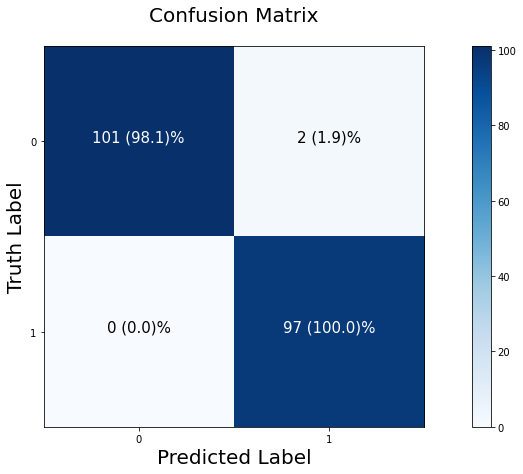

In [ ]:
# Let's try the function

plot_confusion_matrix(y_test, tf.round(y_preds))

What does itertools.product do ? Combines two things into each combination.

In [ ]:
import itertools

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
  print(i, j)

0 0
0 1
1 0
1 1


# Multi-class Classification Problem 

We've seen a binary classification example (predicting one thing or another), but what if you had multiple different classes of things?

For example, say you are a fashion company and wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes or options to predict/identify, then this is known as **multi-class classification**.

To start, we'll need some data. This time we will import data from a library rather creating our own. Thankfully Tensorflow has a multiclass classfication dataset known as [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) built-in. Meaning we can get straight away.

In [1]:
import tensorflow as tf

## Import the data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been splited into train and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Let's view the data and it's shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

So we have 
* 60000 samples in training data
* 10000 samples in test data
* input is in 28 * 28 grayscale image.

In [4]:
train_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

It's in the form of array with many numbers can't tell what it is.


But we can plot these numbers and see what it is.

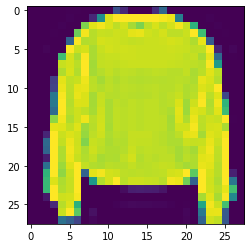

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]) # since it's an image

Here we go, now we know what it is, it is something like a sweatshirt. But to identify that we have to check it's labels.

In [6]:
train_labels[7]

2

Oh ! It's something kind of a category or number. 


So after going to the fashion_mnist documentation, these are the numbers of it's respective human readable labels. Let's create a dataset for that as `class_names`

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

I've created the labels dataframe in the same order it was given in the [docs](https://github.com/zalandoresearch/fashion-mnist)

In [8]:
# if checking the label of the above ploted image
class_names[2], # which means class_names[train_labels[7]]

('Pullover',)

In [9]:
class_names[train_labels[7]]

'Pullover'

Now we have figured it out, that what kind of data we have and what we want to predict.

## Visualize the data

Let's visualize some more data, for that let's create a function.

In [10]:
def plot_random_training_data():  
  import random
  plt.figure(figsize=(10,7))
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

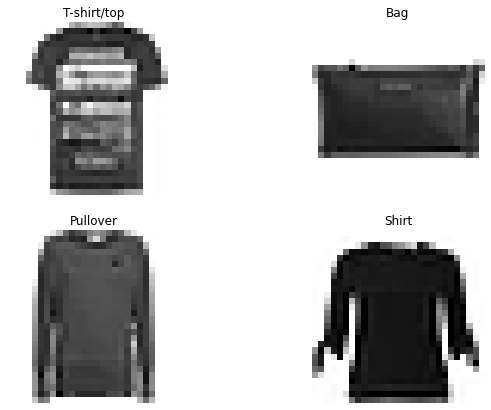

In [11]:
plot_random_training_data()

## Building a model

Alright, now we've visualized our data. It's time to build the model. 

But since this is a multi-class classification problem, so we might need to take care of few things as we did for Binary Class classification problem.

Let's check,

* **Input Shape** : We will have to deal with 28 x 28 tensors (the height and width of our images)
* **Output Shape** : 10, since we have 10 `class_names` to identify
* **Activation Function**: 
  - Input Activation function: Since this is non-linear input so we will be using `ReLu`
  - Output Activation function: We'll need to change the activation function of output layer, we've used `sigmoid` for binary-class problem, for multi-class we will use `softmax`
    - **Softmax** : It converts all the output vector into probabilities that the sum of all the probabilities is equal to 1. Kind of argmax, but softer version. 
      - Formula is, Exponential sum of one element divided by exponential sum of all the elements in the vector. 

* **Loss Function** : We have to change the loss functions from **BinaryCrossentropy** to **CategoricalCrossentropy**.


I guess, these are the changes needed to build our multi-class classification model, but let's see how it'll perform.

In [12]:
train_data[0].shape

(28, 28)

In [13]:
# set the random seed
tf.random.set_seed(17)

# Create a model
model_10 = tf.keras.Sequential([
    # We need to flatten our input from 28x28 to 784, or it will give shape error
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # Output layer, 1 per class, we have 10 classes so 10 neurons
])

# Compile the model
model_10.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='Adam',
                 metrics=['accuracy'])

# one more error will be thrown if we use categoricalcrossentropy, because it accepts one_hot encoded labels, 
# but we are not hot encoded our labels, we can just by doing tf.one_hot(train_labels, depth=10)

# Fit the model
non_norm_history = model_10.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data = (test_data, test_labels)) 
# validation_data will give us the idea of how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3056 - accuracy: 0.2146 - val_loss: 1.7896 - val_accuracy: 0.3281
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6004 - accuracy: 0.3801 - val_loss: 1.4720 - val_accuracy: 0.4007
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3663 - accuracy: 0.4541 - val_loss: 1.2366 - val_accuracy: 0.4872
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1881 - accuracy: 0.5117 - val_loss: 1.1598 - val_accuracy: 0.5281
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0965 - accuracy: 0.5493 - val_loss: 1.0501 - val_accuracy: 0.5603
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0415 - accuracy: 0.5642 - val_loss: 1.0261 - val_accuracy: 0.5574
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0281 - accuracy: 0.5650 - val_loss: 1.0228 - val_accuracy:

In [14]:
# Check the shapes of our model
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Alright, but if we notice the results of fitting our model, we have two extra response varibales as in `val_loss` and `val_accuracy`

These appears because of the parameter that we pass during fitting the model through `validation_data`.

This is a good feature that we might be aware of our model that how it can perform with unseen data i.e `test_data`

Well, in terms of metrics we obtain after training our model, the `accuracy` is **57%** and `loss` is fairly low. But still we should improve our model to get better `accuracy`.

So What we can do for this ?

Yes !! We have to improve our model. But how ?

## Improving the performance of a model

A model can be improved in many ways but some common ways we can pass through will be,
* Visualize our inputs, **if normalization needed then normalize it**.
* **Adjust the layers and activation function**, but in our case this model performed very well in previous experiment, so we might not touch this one.
* **Tweak the optimizer function**, Adjust the learning rate by finding the best/ideal learning rate
* and Many more...

We will check 1st and 3rd because other things looks good based on our previous experiments...


### Normalisation

> *Why normalization ?*

While getting the data ready prior to building a model, we should take care of below things,
* Turn all data into numbers (neural networks can't handle strings)
* Make sure all of your tensors are in the right shape
* Scale features (normalize or standardize, neural network tend to prefer normalization)

> *What is normalization ?*

So normalization is turning the spread of inputs into normal distribution. 
In simple words, if we have input spread of `min` and `max` as `0` and `1000`, then it would be hard for machines to learn the pattern, so normalization will shrink that spread between 0~1.

Let's see in our case,

In [15]:
train_data.min() , train_data.max()

(0, 255)

so if we want to spread it between 0 ~ 1, then we have to divide each number with the maximum.

In [16]:
# let's normalize our training and test data
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

In [17]:
# view the normalize data
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
# and if we check the normalize max and min 
tf.reduce_max(train_data_norm), tf.reduce_min(train_data_norm)

(<tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0>)

Now it's ready for building a model again

In [19]:
# set random seed
tf.random.set_seed(17)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling a model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fitting a model
norm_history = model_11.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1375 - accuracy: 0.5717 - val_loss: 0.7929 - val_accuracy: 0.7111
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7084 - accuracy: 0.7359 - val_loss: 0.6931 - val_accuracy: 0.7483
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6472 - accuracy: 0.7591 - val_loss: 0.6398 - val_accuracy: 0.7673
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6015 - accuracy: 0.7818 - val_loss: 0.6034 - val_accuracy: 0.7890
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.8001 - val_loss: 0.5898 - val_accuracy: 0.7946
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5539 - accuracy: 0.8081 - val_loss: 0.5772 - val_accuracy: 0.7974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5420 - accuracy: 0.8139 - val_loss: 0.5763 - val_accuracy:

Amazing ! We used the same model as before but this time we normalized the data and notice a much higher accuracy value !

### Comparision between Normalization history and Non Normalization history.

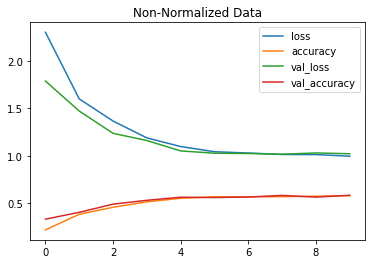

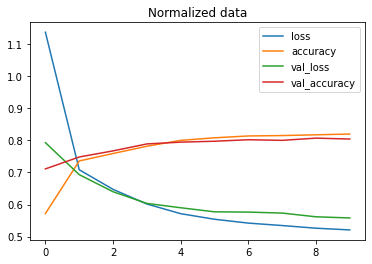

In [20]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

From these two plots, we can see how much quicker our model with the normalized data(`model_11`) improved than the model with the non-normalized data(`model_10`)

> 🔑 **Note:** The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens ?

### Finding the Ideal learning rate

We'll use the same architecture we've been using.

In [21]:
# set random seed
tf.random.set_seed(17)

# Creating a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling a model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_12.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1375 - accuracy: 0.5717 - val_loss: 0.7929 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7062 - accuracy: 0.7364 - val_loss: 0.6870 - val_accuracy: 0.7504 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.7626 - val_loss: 0.6268 - val_accuracy: 0.7749 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.7928 - val_loss: 0.5845 - val_accuracy: 0.7968 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5643 - accuracy: 0.8038 - val_loss: 0.5883 - val_accuracy: 0.7971 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5500 - accuracy: 0.8092 - val_loss: 0.5684 - val_accuracy: 0.8000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

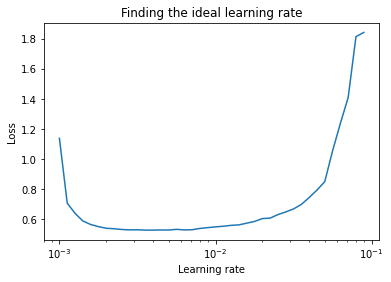

In [22]:
# plot the learning rate decay
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In this case, it looks like somewhere close to the default learning rate of the `Adam optimizer(0.001)` is the ideal learning rate.

So it'll produce same results.

But for completeness we will built with the default learning rate

In [23]:
# set the random seed
tf.random.set_seed(17)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1375 - accuracy: 0.5717 - val_loss: 0.7929 - val_accuracy: 0.7111
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7084 - accuracy: 0.7359 - val_loss: 0.6931 - val_accuracy: 0.7483
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6472 - accuracy: 0.7591 - val_loss: 0.6398 - val_accuracy: 0.7673
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6015 - accuracy: 0.7818 - val_loss: 0.6034 - val_accuracy: 0.7890
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.8001 - val_loss: 0.5898 - val_accuracy: 0.7946
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5539 - accuracy: 0.8081 - val_loss: 0.5772 - val_accuracy: 0.7974
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5420 - accuracy: 0.8139 - val_loss: 0.5763 - val_accuracy:

Now, we've covered many things but let's see what more we can do:

* Evaluate its performance using other classification metrics (such as a **confusion matrix** or **classification report**).
* Assess some of it's predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through first,

## Evaluating a model

For this we need to plot a confusion matrix, and we have function that we created earlier, we'll tweak that a little bit for this use case and generalise it.

In [24]:
import itertools

def make_confusion_matrix(y_true, y_preds, classes=None, figsize=(10,10), text_size=15):
  """
  Make a labelled confusion matrix comparing predictions and ground truth labels.

  if classes is passed, confusion matrix will be labelled, if not, integer class 
  values will be used.

  Args:
    y_true: Array of truth labels
    y_preds : Array of predicted labels
    classes : Array of class labels
    figsize : Size of output figure
    text_size : Size of output figure text

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred
  """

  # Create confusion matrix
  cm = tf.math.confusion_matrix(y_true, y_preds).numpy()
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)


  # Are there list of classes ?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axis will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  # Set the threshold of the color
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color='white' if cm[i,j] > threshold else 'black',
             size=text_size)

                        

Since a confusion matrix compares the truth labels (`test_labels`) to the predicted labels, we have to make some predictions with our model.

In [25]:
# Make predictions with the most recent model
y_probs = model_13.predict(test_data_norm) 

313/313 [==============================] - 1s 1ms/step


In [26]:
y_probs[0]

array([3.99176213e-11, 3.75302189e-28, 2.82481119e-23, 3.17371476e-11,
       2.18085520e-16, 9.79133695e-02, 5.76604389e-12, 1.07375905e-01,
       1.01106174e-07, 7.94710636e-01], dtype=float32)

The above results are not the end predictions that we can compare with our truth labels, these are prediction probablities we have to find the find the max probability from this array and then compare that index with our `class_names` array.

Let's do that.

In [27]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle Boot')

Likewise we can identify which class name our model predicted. Let's do the same thing for all prediction.

In [28]:
# Convert all the probabilities into predictions
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them again the truth labels.

In [29]:
tf.math.confusion_matrix(test_labels, y_preds).numpy()

array([[740,   0,  28, 122,   2,   0,  89,   0,  18,   1],
       [  1, 949,  12,  30,   6,   0,   1,   0,   1,   0],
       [ 24,   7, 726,  16, 139,   0,  82,   0,   6,   0],
       [ 35,  20,  27, 836,  37,   0,  36,   0,   9,   0],
       [  0,  11, 132,  20, 750,   0,  83,   0,   4,   0],
       [  0,   0,   0,   0,   0, 925,   1,  44,   4,  26],
       [158,   3, 153,  63, 131,   0, 444,   0,  48,   0],
       [  0,   0,   0,   0,   0,  36,   0, 920,   3,  41],
       [  1,   0,   4,  12,   5,   4,  42,   7, 924,   1],
       [  0,   0,   0,   0,   0,  24,   0,  33,   2, 941]], dtype=int32)

Yes, this our default confusion matrix that tensorflow provides but let's make it prettier using our function.

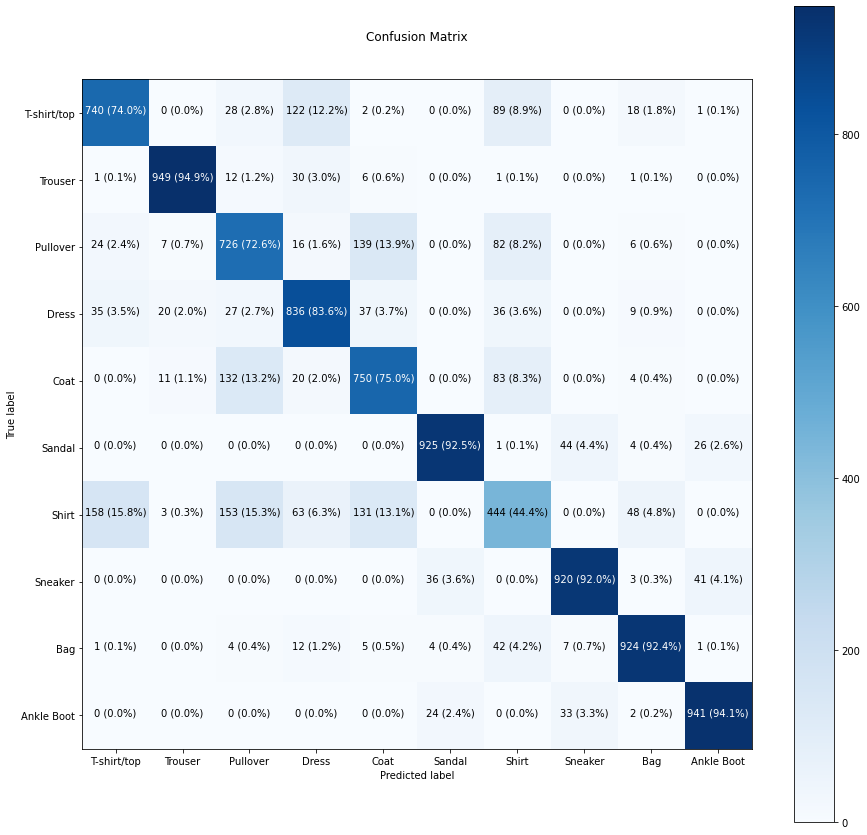

In [30]:
import numpy as np

make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

Beautiful !!

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some ?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [31]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predicted and truth label.

  **Args**
    model: a trained model (trained on data similar to what's in images)
    images: a set of random images (in tensor form)
    true_labels: array of ground truth labels for images
    classes: array of class names for images

  Returns:
    a plot of a random images from `images` with a predicted label and truth label
  """

  # set a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image)
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the target image 
  plt.imshow(target_image)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color=color)

1/1 [==============================] - 0s 56ms/step


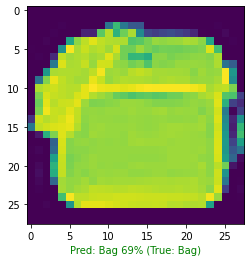

In [32]:
# Check out a random image as well as its prediction
plot_random_image(model=model_13, 
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning ?

We've talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_13`) using the `layers` attributes

In [33]:
model_13.layers

We can access a target layer using indexing.

In [34]:
# Extract a particular layer
model_13.layers[1]

Here if we backtrack what's happening in each layer, we must check what's inside those layers, which is something like postmertom.

In [36]:
# there is a function called get_weights(), which return the weights and biases of each layer
weights, biases = model_13.layers[1].get_weights()

In [37]:
weights.shape, weights

((784, 4), array([[ 0.11494966, -0.08704561,  0.72648317, -0.73969394],
        [ 0.26143092,  0.3477279 ,  0.315582  , -0.35609895],
        [-0.7862448 , -0.16041529,  0.6013232 , -0.3844347 ],
        ...,
        [-0.13988331,  0.23006174,  0.45158008, -0.17723212],
        [ 0.73746234, -0.15846461,  0.02825616, -0.08640288],
        [ 0.03219249, -0.19253926,  0.31703618,  0.010052  ]],
       dtype=float32))

Notice, the shape of the weights, is (784, 4) which says that each datapoints meaning (28,28) of each image i.e 784 weights per neuron or units i.e we have 4 neurons.

So, the weights matrix is the same shape as the input data, which in our case is 784 (28 x 28). And there's a copy of weights matrix for each neuron in the selected layer (our selected layer has 4 neurons).

Each values in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the `kernel_initializer` parameter when creating a layer, the default is `"glorot_uniform"`) and are then updated to better representative values of the data (non-random) by the neural network during training.

![image](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)

Now let's check out the bias vector.

In [38]:
biases, biases.shape

(array([0.20797744, 2.0520694 , 0.84964937, 0.55784357], dtype=float32), (4,))

So we have an array of length 4, means shape is 4 which is similar to number of neurons per layers.

It signifies that each neuron has it's value of bias.

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the `bias_initializer` parameter) 

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [39]:
# can now calculate the number of parameters in our model
model_13.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've build a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

Starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility `plot_model()`

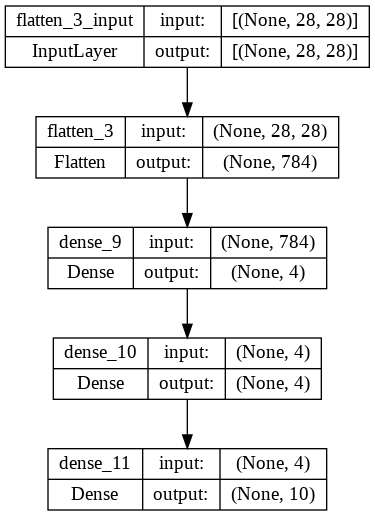

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model_13, show_shapes = True)

# How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weights matrices and biases values every epoch (in our case, when we call the `fit()` function).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation)

In other words, data and labels pass through a model(**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.